In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Debidutta Acharya\\(INTERNSHIP 5TH SEM)\\mam folder\\crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,92,52,45,20.879744,82.002744,6.502985,202.935536,rice
1,63,47,41,21.770462,80.319644,7.038096,226.655537,rice
2,74,47,44,23.004459,82.320763,7.840207,263.964248,rice
3,88,45,45,26.491096,80.158363,6.980401,242.864034,rice
4,100,59,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,117,37,27,26.774637,66.413269,6.780064,177.774507,coffee
2196,89,23,34,27.417112,56.636362,6.086922,127.924610,coffee
2197,104,33,28,24.131797,67.225123,6.362608,173.322839,coffee
2198,118,19,28,26.272418,52.127394,6.758793,127.175293,coffee
2199,98,16,31,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

banana         100
mungbean       100
jute           100
lentil         100
mango          100
pomegranate    100
blackgram      100
rice           100
orange         100
apple          100
maize          100
pigeonpeas     100
coffee         100
grapes         100
papaya         100
coconut        100
kidneybeans    100
watermelon     100
mothbeans      100
cotton         100
chickpea       100
muskmelon      100
Name: label, dtype: int64

<AxesSubplot:>

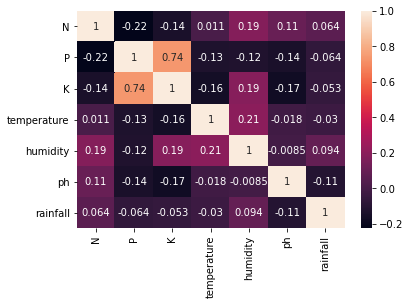

In [11]:
sns.heatmap(df.corr(),annot=True)

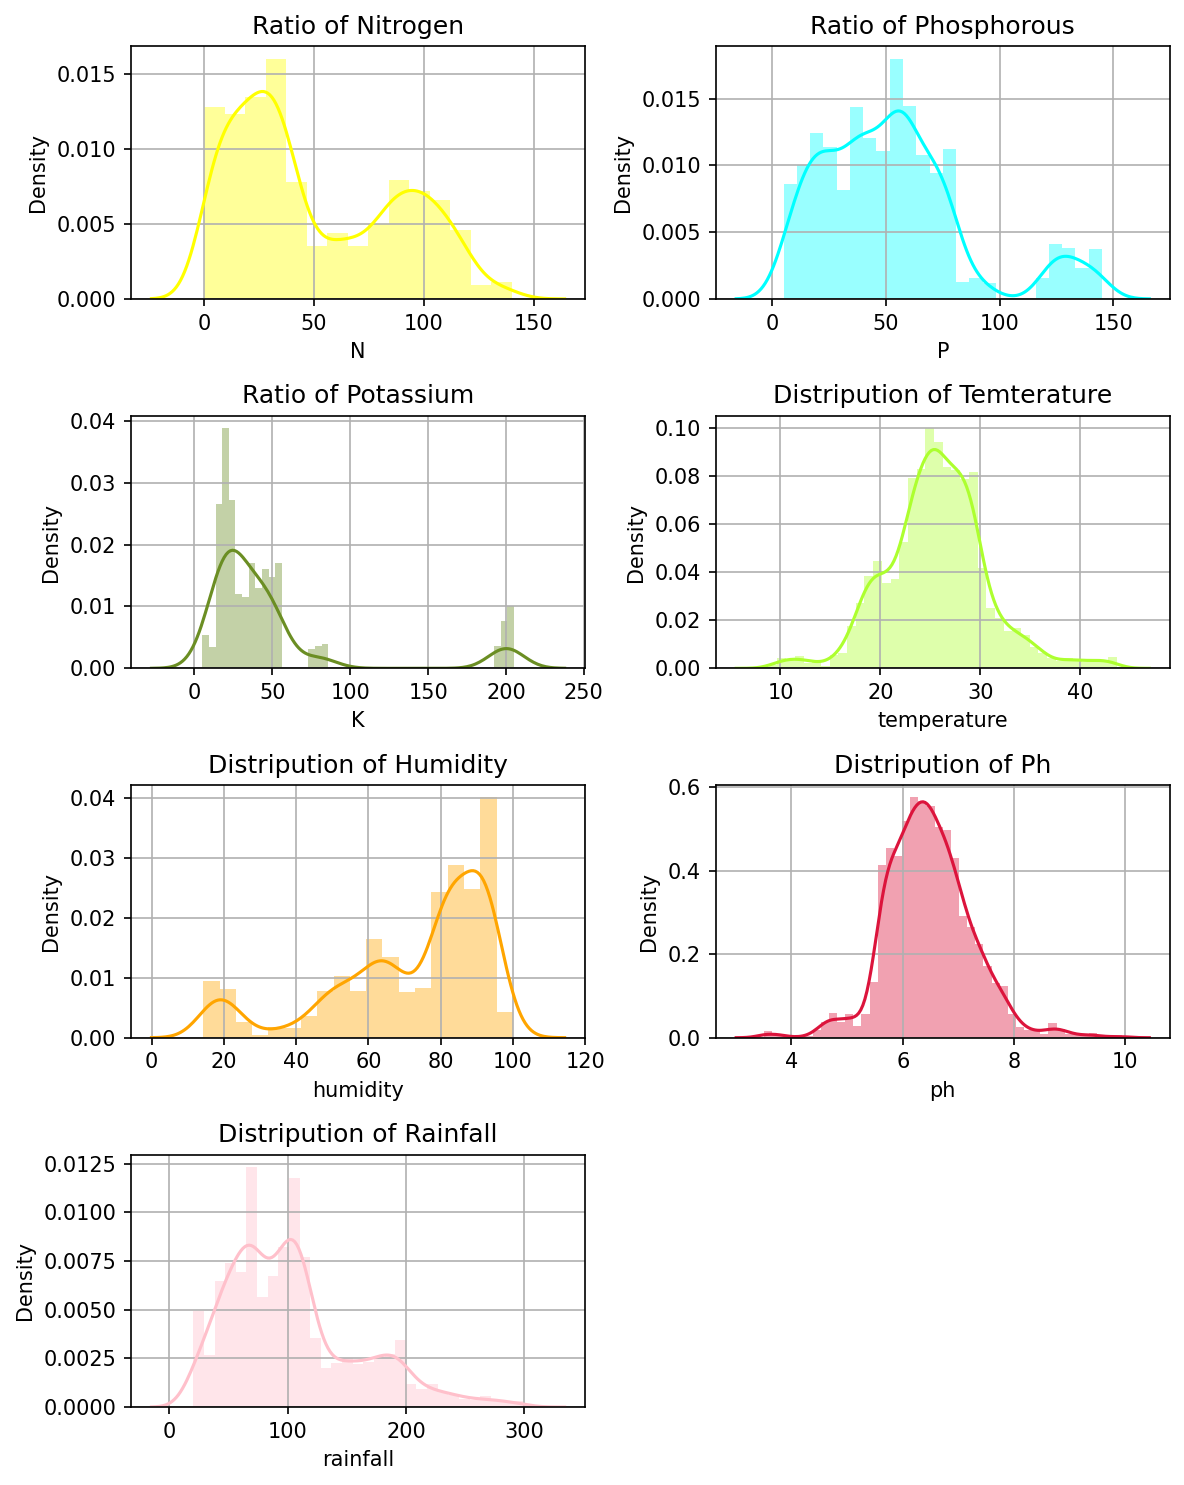

In [12]:
## over all distribution

plt.rcParams['figure.figsize'] = (8, 10)
plt.rcParams['figure.dpi'] = 150

# ratio of Nitrogen content in soil
plt.subplot(4, 2, 1)
sns.distplot(df['N'], color='yellow')
plt.title('Ratio of Nitrogen', fontsize = 12)
plt.tight_layout()
plt.grid()

# ratio of Phosphorous content in soil
plt.subplot(4, 2, 2)
sns.distplot(df['P'], color='cyan')
plt.title('Ratio of Phosphorous', fontsize = 12)
plt.tight_layout()
plt.grid()

# ratio of Potassium content in soil
plt.subplot(4, 2, 3)
sns.distplot(df['K'], color = 'olivedrab')
plt.title('Ratio of Potassium', fontsize = 12)
plt.tight_layout()
plt.grid()

# temperature in degree Celsius
plt.subplot(4, 2, 4)
sns.distplot(df['temperature'], color = 'greenyellow')
plt.title('Distripution of Temterature', fontsize = 12)
plt.tight_layout()
plt.grid()

# humidity - relative humidity in %
plt.subplot(4, 2, 5)
sns.distplot(df['humidity'], color = 'orange')
plt.title('Distripution of Humidity', fontsize = 12)
plt.tight_layout()
plt.grid()

# ph - ph value of the soil
plt.subplot(4, 2, 6)
sns.distplot(df['ph'], color = 'crimson')
plt.title('Distripution of Ph', fontsize = 12)
plt.tight_layout()
plt.grid()

# rainfall - rainfall in mm
plt.subplot(4, 2, 7)
sns.distplot(df['rainfall'], color = 'pink')
plt.title('Distripution of Rainfall', fontsize = 12)
plt.tight_layout()
plt.grid()


In [13]:
print("Crops which requires very High Ratio of Nitrogen Content in Soil ? \n\nData: The answer is : {}" .format(df[df['N'] > 120]['label'].unique()))

Crops which requires very High Ratio of Nitrogen Content in Soil ? 

Data: The answer is : ['cotton']


### Seperating features and target label

In [14]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [15]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [16]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  94.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      0.95      0.98        21
      coffee       1.00      0.86      0.93        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.78      1.00      0.88        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      0.71      0.83        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.68      0.81        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       0.96      1.00      0.98        23
      orange       1.00      1.00 

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [20]:
score

array([0.93636364, 0.90681818, 0.91818182, 0.91818182, 0.94090909])

### Saving trained Decision Tree model

In [21]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'C:\\Users\\Debidutta Acharya\\(INTERNSHIP 5TH SEM)\\(FINAL PROJECT)\\SUPER FINAL\\DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [23]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99772727, 0.99318182, 0.99318182, 0.98863636])

### Saving trained Guassian Naive Bayes model

In [24]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'C:\\Users\\Debidutta Acharya\\(INTERNSHIP 5TH SEM)\\(FINAL PROJECT)\\SUPER FINAL\\NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [25]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9727272727272728
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.82      0.82      0.82        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [26]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98181818, 0.97727273, 0.99090909, 0.98181818, 0.98181818])

In [27]:
#Saving trained SVM model

In [28]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'C:\\Users\\Debidutta Acharya\\(INTERNSHIP 5TH SEM)\\(FINAL PROJECT)\\SUPER FINAL/SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9568181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      0.95      0.98        21
      coffee       0.96      1.00      0.98        22
      cotton       0.95      0.90      0.92        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      0.79      0.81        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       1.00      1.00      1.00        23
       maize       0.91      0.95      0.93        21
       mango       1.00      0.92      0.96        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [30]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95681818, 0.95909091, 0.95227273, 0.95681818, 0.96363636])

### Saving trained Logistic Regression model

In [31]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'C:\\Users\\Debidutta Acharya\\(INTERNSHIP 5TH SEM)\\(FINAL PROJECT)\\SUPER FINAL\\LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.89      1.00      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [33]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99318182, 0.99318182, 0.98863636, 0.98863636])

### Saving trained Random Forest model

In [34]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'C:\\Users\\Debidutta Acharya\\(INTERNSHIP 5TH SEM)\\(FINAL PROJECT)\\SUPER FINAL\\RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

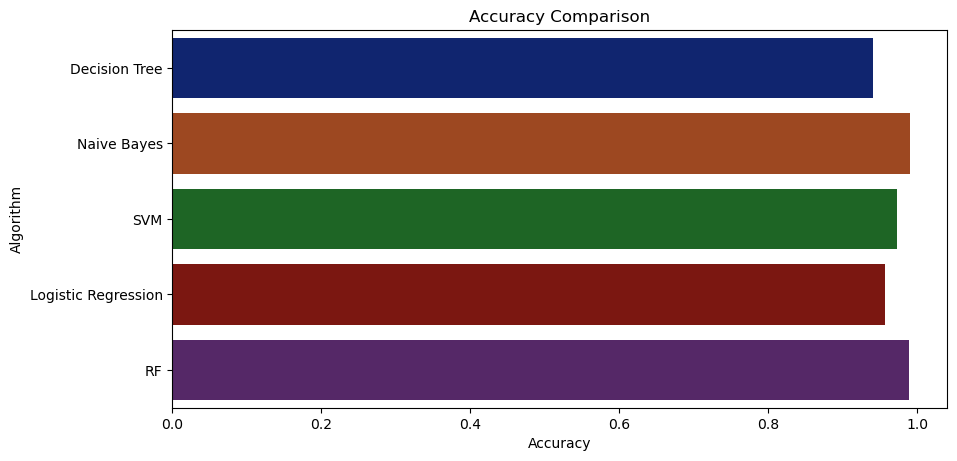

In [35]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [36]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9409090909090909
Naive Bayes --> 0.990909090909091
SVM --> 0.9727272727272728
Logistic Regression --> 0.9568181818181818
RF --> 0.9886363636363636


## Making a prediction

In [37]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [38]:
data = np.array([[85, 45, 60, 28, 70.3, 7.0, 45.9]])
prediction = RF.predict(data)
print(prediction)

['watermelon']


## Crop Recommendation

In [39]:
import pyttsx3                                                          
import pandas as pd                                                      
from sklearn import preprocessing                                        
import numpy as np                                                        
import PySimpleGUI as sg     

In [40]:
df = pd.read_csv('C:\\Users\\Debidutta Acharya\\(INTERNSHIP 5TH SEM)\\mam folder\\crop_recommendation.csv')

In [41]:
csv = pd.read_csv('C:\\Users\\Debidutta Acharya\\(INTERNSHIP 5TH SEM)\\mam folder\\crop_recommendation.csv', header = 0)                            # Importing our excel data from a specific file.
print(csv)                                                             
print(csv.shape) 

        N   P   K  temperature   humidity        ph    rainfall   label
0      92  52  45    20.879744  82.002744  6.502985  202.935536    rice
1      63  47  41    21.770462  80.319644  7.038096  226.655537    rice
2      74  47  44    23.004459  82.320763  7.840207  263.964248    rice
3      88  45  45    26.491096  80.158363  6.980401  242.864034    rice
4     100  59  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  117  37  27    26.774637  66.413269  6.780064  177.774507  coffee
2196   89  23  34    27.417112  56.636362  6.086922  127.924610  coffee
2197  104  33  28    24.131797  67.225123  6.362608  173.322839  coffee
2198  118  19  28    26.272418  52.127394  6.758793  127.175293  coffee
2199   98  16  31    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]
(2200, 8)


In [42]:
engine = pyttsx3.init('sapi5')                                          
voices = engine.getProperty('voices')
rate = engine.getProperty('rate')
engine.setProperty('rate', rate-20)
engine.setProperty('voice',voices[0].id)

In [43]:
def speak(audio):                                                         
    engine.say(audio) 
    engine.runAndWait()


le = preprocessing.LabelEncoder()                                         
crop = le.fit_transform(list(csv["label"])) 


NITROGEN = list(csv["N"])                                        
PHOSPHORUS = list(csv["P"])                                     
POTASSIUM = list(csv["K"])                                      
TEMPERATURE = list(csv["temperature"])                                 
HUMIDITY = list(csv["humidity"])                                        
PH = list(csv["ph"])                                                   
RAINFALL = list(csv["rainfall"])                                        

In [44]:
features = list(zip(NITROGEN, PHOSPHORUS, POTASSIUM, TEMPERATURE, HUMIDITY, PH, RAINFALL)) 

In [45]:
features = np.array([NITROGEN, PHOSPHORUS, POTASSIUM, TEMPERATURE, HUMIDITY, PH, RAINFALL])

In [46]:
features = features.transpose()

In [47]:
print(features.shape) 

(2200, 7)


In [48]:
print(crop.shape) 

(2200,)


In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
model = KNeighborsClassifier(n_neighbors=3)  

In [51]:
model.fit(features, crop)

KNeighborsClassifier(n_neighbors=3)

In [52]:
temp = df[df.label == 'rice']
mean_rainfall_rice = temp["rainfall"].mean()
mean_rainfall_rice = int(mean_rainfall_rice)
mean_rainfall_rice

236

In [53]:
temp = df[df.label == 'maize']
mean_rainfall_maize = temp["rainfall"].mean()
mean_rainfall_maize = int(mean_rainfall_maize)
mean_rainfall_maize

84

In [54]:
temp = df[df.label == 'chickpea']
mean_rainfall_chickpea = temp["rainfall"].mean()
mean_rainfall_chickpea = int(mean_rainfall_chickpea)
mean_rainfall_chickpea

80

In [55]:
temp = df[df.label == 'kidneybeans']
mean_rainfall_kidneybeans = temp["rainfall"].mean()
mean_rainfall_kidneybeans = int(mean_rainfall_kidneybeans)
mean_rainfall_kidneybeans

105

In [56]:
temp = df[df.label == 'pigeonpeas']                 
mean_rainfall_pigeonpeas = temp ["rainfall"].mean()
mean_rainfall_pigeonpeas = int(mean_rainfall_pigeonpeas)
mean_rainfall_pigeonpeas

149

In [57]:
temp = df[df.label == 'mothbeans']
mean_rainfall_mothbeans = temp["rainfall"].mean()
mean_rainfall_mothbeans = int(mean_rainfall_mothbeans)
mean_rainfall_mothbeans

51

In [58]:
temp = df[df.label == 'mungbean']
mean_rainfall_mungbean = temp["rainfall"].mean()
mean_rainfall_mungbean = int(mean_rainfall_mungbean)
mean_rainfall_mungbean

48

In [59]:
temp = df[df.label == 'blackgram']
mean_rainfall_blackgram = temp["rainfall"].mean()
mean_rainfall_blackgram = int(mean_rainfall_blackgram)
mean_rainfall_blackgram

67

In [60]:
temp = df[df.label == 'lentil']
mean_rainfall_lentil = temp["rainfall"].mean()
mean_rainfall_lentil = int(mean_rainfall_lentil)
mean_rainfall_lentil

45

In [61]:
temp = df[df.label == 'pomegranate']
mean_rainfall_pomegranate = temp["rainfall"].mean()
mean_rainfall_pomegranate = int(mean_rainfall_pomegranate)
mean_rainfall_pomegranate

107

In [62]:
temp = df[df.label == 'banana']
mean_rainfall_banana = temp["rainfall"].mean()
mean_rainfall_banana = int(mean_rainfall_banana)
mean_rainfall_banana

104

In [63]:
temp = df[df.label == 'mango']
mean_rainfall_mango = temp["rainfall"].mean()
mean_rainfall_mango = int(mean_rainfall_mango)
mean_rainfall_mango

94

In [64]:
temp = df[df.label == 'grapes']
mean_rainfall_grapes = temp["rainfall"].mean()
mean_rainfall_grapes = int(mean_rainfall_grapes)
mean_rainfall_grapes

69

In [65]:
temp = df[df.label == 'watermelon']
mean_rainfall_watermelon = temp["rainfall"].mean()
mean_rainfall_watermelon = int(mean_rainfall_watermelon)
mean_rainfall_watermelon

50

In [66]:
temp = df[df.label == 'muskmelon']
mean_rainfall_muskmelon = temp["rainfall"].mean()
mean_rainfall_muskmelon = int(mean_rainfall_muskmelon)
mean_rainfall_muskmelon

24

In [67]:
temp = df[df.label == 'apple']
mean_rainfall_apple = temp["rainfall"].mean()
mean_rainfall_apple = int(mean_rainfall_apple)
mean_rainfall_apple

112

In [68]:
temp = df[df.label == 'orange']
mean_rainfall_orange = temp["rainfall"].mean()
mean_rainfall_orange = int(mean_rainfall_orange)
mean_rainfall_orange

110

In [69]:
temp = df[df.label == 'papaya']
mean_rainfall_papaya = temp["rainfall"].mean()
mean_rainfall_papaya = int(mean_rainfall_papaya)
mean_rainfall_papaya

142

In [70]:
temp = df[df.label == 'coconut']
mean_rainfall_coconut = temp["rainfall"].mean()
mean_rainfall_coconut = int(mean_rainfall_coconut)
mean_rainfall_coconut

175

In [71]:
temp = df[df.label == 'cotton']
mean_rainfall_cotton = temp["rainfall"].mean()
mean_rainfall_cotton = int(mean_rainfall_cotton)
mean_rainfall_cotton

80

In [72]:
temp = df[df.label == 'jute']
mean_rainfall_jute = temp["rainfall"].mean()
mean_rainfall_jute = int(mean_rainfall_jute)
mean_rainfall_jute

174

In [73]:
temp = df[df.label == 'coffee']
mean_rainfall_coffee = temp["rainfall"].mean()
mean_rainfall_coffee = int(mean_rainfall_coffee)
mean_rainfall_coffee

158

In [74]:
rainfall_arr = np.array([mean_rainfall_rice, mean_rainfall_maize, mean_rainfall_chickpea, mean_rainfall_kidneybeans, mean_rainfall_pigeonpeas, mean_rainfall_mothbeans, mean_rainfall_mungbean, mean_rainfall_blackgram, mean_rainfall_lentil, mean_rainfall_pomegranate, mean_rainfall_banana, mean_rainfall_mango, mean_rainfall_grapes, mean_rainfall_watermelon, mean_rainfall_muskmelon, mean_rainfall_orange, mean_rainfall_papaya, mean_rainfall_coconut, mean_rainfall_cotton, mean_rainfall_jute, mean_rainfall_coffee])

In [75]:
rainfall_arr

array([236,  84,  80, 105, 149,  51,  48,  67,  45, 107, 104,  94,  69,
        50,  24, 110, 142, 175,  80, 174, 158])

In [76]:
for i in rainfall_arr:
    print(i)

236
84
80
105
149
51
48
67
45
107
104
94
69
50
24
110
142
175
80
174
158


In [77]:
crop_arr = np.array(["rice", "maize", "chickpea", "kidneybeans", "pigeonpeas", "mothbeans", "mungbean", "blackgram", "lentil", "pomegranate", "banana", "mango", "grapes", "watermelon", "muskmelon", "orange", "papaya", "coconut", "cotton", "jute", "coffee"])

In [78]:
column_to_be_centered = [[sg.Button('Recommend'), sg.Button('Exit')]]

layout = [[sg.Text("\u0332".join('   Crop Recommendation System For Precision Agriculture'), font=("Times", 30), text_color = 'yellow', background_color = 'forestgreen')],
          [sg.Text('', background_color = 'forestgreen')], 
          [sg.Text('Please enter the following details :-', font=("Helvetica", 20), background_color = 'forestgreen')],                                                                                          
          [sg.Text('Enter ratio of Nitrogen in the soil                                  :', font=("Helvetica", 20), background_color = 'forestgreen'), sg.Input(font=("Helvetica",20), size = (15,1) )],
          [sg.Text('Enter ratio of Phosphorous in the soil                           :', font=("Helvetica", 20), background_color = 'forestgreen'), sg.Input(font=("Helvetica", 20),size = (15,1))],
          [sg.Text('Enter ratio of Potassium in the soil                               :', font=("Helvetica", 20), background_color = 'forestgreen'), sg.Input(font=("Helvetica", 20),size = (15,1))],
          [sg.Text('Enter average Temperature value around the field        :', font=("Helvetica", 20), background_color = 'forestgreen'), sg.Input(font=("Helvetica", 20),size = (15,1)), sg.Text('*C', font=("Helvetica", 20), background_color = 'forestgreen')], 
          [sg.Text('Enter average percentage of Humidity around the field :', font=("Helvetica", 20), background_color = 'forestgreen'), sg.Input(font=("Helvetica", 20),size = (15,1)), sg.Text('%', font=("Helvetica", 20), background_color = 'forestgreen')], 
          [sg.Text('Enter PH value of the soil                                             :', font=("Helvetica", 20), background_color = 'forestgreen'), sg.Input(font=("Helvetica", 20),size = (15,1))], 
          [sg.Text('Enter average amount of Rainfall around the field         :', font=("Helvetica", 20), background_color = 'forestgreen' ), sg.Input(font=("Helvetica", 20),size = (15,1)),sg.Text('mm', font=("Helvetica", 20), background_color = 'forestgreen')],
          [sg.Text(size=(52,1),font=("Helvetica",20), background_color = 'forestgreen' , text_color = 'yellow', key='-OUTPUT1-' )],
          [sg.Text(size=(50,1),font=("Helvetica",20), background_color = 'forestgreen' , text_color = 'yellow', key='-OUTPUT2-' )],
          [sg.Push(),sg.Button('Submit', font=("Helvetica", 20)), sg.Button('Quit', font=("Helvetica", 20)), sg.Push()]]
window = sg.Window('Crop Recommendation Assistant', layout, background_color = 'forestgreen') 


In [79]:
while True: 
    event, values = window.read()
    if event == sg.WINDOW_CLOSED or event == 'Quit':                                                                                            # If the user will press the quit button then the program will end up.
        break
    print(values[0])
    nitrogen_content =         values[0]                                                                                                        # Taking input from the user about nitrogen content in the soil.
    phosphorus_content =       values[1]                                                                                                        # Taking input from the user about phosphorus content in the soil.
    potassium_content =        values[2]                                                                                                        # Taking input from the user about potassium content in the soil.
    temperature_content =      values[3]                                                                                                        # Taking input from the user about the surrounding temperature.
    humidity_content =         values[4]                                                                                                        # Taking input from the user about the surrounding humidity. 
    ph_content =               values[5]                                                                                                        # Taking input from the user about the ph level of the soil.
    rainfall =                 values[6]                                                                                                        # Taking input from the user about the rainfall.
    predict1 = np.array([nitrogen_content,phosphorus_content, potassium_content, temperature_content, humidity_content, ph_content, rainfall])  # Converting all the data that we collected from the user into a array form to make further predictions.
    print(predict1)                                                                                                                             # Printing the data after being converted into a array form.
    predict1 = predict1.reshape(1,-1)                                                                              # Reshaping the input data so that it can be applied in the model for getting accurate results.
    print(predict1)                                                                                                # Printing the input data value after being reshaped.
    predict1 = model.predict(predict1)                                                                             # Applying the user input data into the model. 
    print(predict1)                                                                                                # Finally printing out the results.
    crop_name = str()
    if predict1 == 0:                                                                                              # Above we have converted the crop names into numerical form, so that we can apply the machine learning model easily. Now we have to again change the numerical values into names of crop so that we can print it when required. 
        crop_name = 'apple'
    elif predict1 == 1:
        crop_name = 'banana'
    elif predict1 == 2:
        crop_name = 'blackgram'
    elif predict1 == 3:
        crop_name = 'chickpea'
    elif predict1 == 4:
        crop_name = 'coconut'
    elif predict1 == 5:
        crop_name = 'coffee'
    elif predict1 == 6:
        crop_name = 'cotton'
    elif predict1 == 7:
        crop_name = 'grapes'
    elif predict1 == 8:
        crop_name = 'jute'
    elif predict1 == 9:
        crop_name = 'kidneybeans'
    elif predict1 == 10:
        crop_name = 'lentil'
    elif predict1 == 11:
        crop_name = 'maize'
    elif predict1 == 12:
        crop_name = 'mango'
    elif predict1 == 13:
        crop_name = 'mothbeans'
    elif predict1 == 14:
        crop_name = 'mungbeans'
    elif predict1 == 15:
        crop_name = 'muskmelon'
    elif predict1 == 16:
        crop_name = 'orange'
    elif predict1 == 17:
        crop_name = 'papaya'
    elif predict1 == 18:
        crop_name = 'pigeonpeas'
    elif predict1 == 19:
        crop_name = 'pomegranate'
    elif predict1 == 20:
        crop_name = 'rice'
    elif predict1 == 21:
        crop_name = 'watermelon'

    if int(humidity_content) >=1 and int(humidity_content)<= 33 :                                                # Here I have divided the humidity values into three categories i.e low humid, medium humid, high humid.
        humidity_level = 'low humid'
    elif int(humidity_content) >=34 and int(humidity_content) <= 66:
        humidity_level = 'medium humid'
    else:
        humidity_level = 'high humid'
    if int(temperature_content) >= 0 and int(temperature_content)<= 6:                                           # Here I have divided the temperature values into three categories i.e cool, warm, hot.
        temperature_level = 'cool'
    elif int(temperature_content) >=7 and int(temperature_content) <= 25:
        temperature_level = 'warm'
    else:
        temperature_level= 'hot' 

    if int(rainfall) >=1 and int(rainfall) <= 100:                                                              # Here I have divided the humidity values into three categories i.e less, moderate, heavy rain.
        rainfall_level = 'less'
    elif int(rainfall) >= 101 and int(rainfall) <=200:
        rainfall_level = 'moderate'
    elif int(rainfall) >=201:
        rainfall_level = 'heavy rain'

    if int(nitrogen_content) >= 1 and int(nitrogen_content) <= 50:                                             # Here I have divided the nitrogen values into three categories.
        nitrogen_level = 'less'
    elif int(nitrogen_content) >=51 and int(nitrogen_content) <=100:
        nitrogen_level = 'not to less but also not to high'
    elif int(nitrogen_content) >=101:
        nitrogen_level = 'high'

    if int(phosphorus_content) >= 1 and int(phosphorus_content) <= 50:                                         # Here I have divided the phosphorus values into three categories.
        phosphorus_level = 'less'
    elif int(phosphorus_content) >= 51 and int(phosphorus_content) <=100:
        phosphorus_level = 'not to less but also not to high'
    elif int(phosphorus_content) >=101:
        phosphorus_level = 'high'

    if int(potassium_content) >= 1 and int(potassium_content) <=50:                                           # Here I have divided the potassium values into three categories.
        potassium_level = 'less'
    elif int(potassium_content) >= 51 and int(potassium_content) <= 100:
        potassium_level = 'not to less but also not to high'
    elif int(potassium_content) >=101:
        potassium_level = 'high'

    if float(ph_content) >=0 and float(ph_content) <=5:                                                        # Here I have divided the ph values into three categories.
        phlevel = 'acidic' 
    elif float(ph_content) >= 6 and float(ph_content) <= 8:
        phlevel = 'neutral'
    elif float(ph_content) >= 9 and float(ph_content) <= 14:
        phlevel = 'alkaline'
    
    print(crop_name)
    print(humidity_level)
    print(temperature_level)
    print(rainfall_level)
    print(nitrogen_level)
    print(phosphorus_level)
    print(potassium_level)
    print(phlevel)
    
    temp = df[df.label == crop_name]
    temp_rainfall = temp["rainfall"].mean()
    
    temp_rainfall = int(temp_rainfall)
    
    count = 0
    
    crop1 = int()
    crop2 = int()
    
    alt_crop_name1 = str()
    alt_crop_name2 = str()
    
    for i in rainfall_arr:
        if(temp_rainfall == 236):
            crop1 = 174
            crop2 = 175
            break
        if(temp_rainfall == 24):
            crop1 = 50
            crop2 = 45
            break
        if(((temp_rainfall - i <= 20 and temp_rainfall - i > 0) or (temp_rainfall - i >= -20) and temp_rainfall - i < 0) and temp_rainfall != i):
            if(count == 0):
                crop1 = i
                count = count+1
            elif(count == 1):
                crop2 = i
                count = count+1
            else:
                break
        
    for index in range(len(rainfall_arr)):
        if(rainfall_arr[index] == crop1):
            alt_crop_name1 = crop_arr[index]
        elif(rainfall_arr[index] == crop2):
            alt_crop_name2 = crop_arr[index]
        
            
        
    crop1 = str(crop1)
    crop2 = str(crop2)

    print("crop1 = " + alt_crop_name1 + " " + ", crop2 = " + alt_crop_name2)
    
#     speak("Sir according to the data that you provided to me. The ratio of nitrogen in the soil is  " + nitrogen_level + ". The ratio of phosphorus in the soil is  " + phosphorus_level + ". The ratio of potassium in the soil is  " + potassium_level + ". The temperature level around the field is  " + temperature_level + ". The humidity level around the field is  " + humidity_level + ". The ph type of the soil is  " + phlevel + ". The amount of rainfall is  " + rainfall_level )  # Making our program to speak about the data that it has received about the crop in front of the user.
    window['-OUTPUT1-'].update('The best crop that you can grow : ' + crop_name)
    window['-OUTPUT2-'].update('The alternative crop you can grow : ' + alt_crop_name1 + ' and ' + alt_crop_name2)
    
    speak("The best crop that you can grow is  " + crop_name)                                                         # Speaking the name of the predicted crop.
    speak("And the alternate crops you can grow are : " + alt_crop_name1 + " and " + alt_crop_name2)

    print(end = "\n" + "The best crop you can grow is : " + crop_name)
    print(end = "\n" + "The alternate crops you can grow are : " + alt_crop_name1 + " and " + alt_crop_name2)

    

window.close() 


90
['90' '21' '50' '28' '92' '6.4' '28']
[['90' '21' '50' '28' '92' '6.4' '28']]
[15]
muskmelon
high humid
hot
less
not to less but also not to high
less
less
neutral
crop1 = watermelon , crop2 = lentil

The best crop you can grow is : muskmelon
The alternate crops you can grow are : watermelon and lentil